In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/lionel-messi-vs-cristiano-ronaldo-club-goals/data.csv')
df_cr7=pd.read_csv('/kaggle/input/lionel-messi-vs-cristiano-ronaldo-club-goals/cr7.csv')
df_mess=pd.read_csv('/kaggle/input/lionel-messi-vs-cristiano-ronaldo-club-goals/messi.csv')

## UNDERSTANDING THE DATA

In [3]:
df.head()

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [4]:
df.columns

Index(['Player', 'Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            1400 non-null   object
 1   Season            1400 non-null   object
 2   Competition       1400 non-null   object
 3   Matchday          1400 non-null   object
 4   Date              1400 non-null   object
 5   Venue             1400 non-null   object
 6   Club              1400 non-null   object
 7   Opponent          1400 non-null   object
 8   Result            1400 non-null   object
 9   Playing_Position  1342 non-null   object
 10  Minute            1400 non-null   object
 11  At_score          1400 non-null   object
 12  Type              1384 non-null   object
 13  Goal_assist       945 non-null    object
dtypes: object(14)
memory usage: 153.2+ KB


In [6]:
df.shape

(1400, 14)

In [7]:
df_cr7.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [8]:
df_cr7.shape

(701, 13)

In [9]:
print(df_mess.shape)
print(df_mess.info())
df_mess.head()

(699, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            699 non-null    object
 1   Competition       699 non-null    object
 2   Matchday          699 non-null    object
 3   Date              699 non-null    object
 4   Venue             699 non-null    object
 5   Club              699 non-null    object
 6   Opponent          699 non-null    object
 7   Result            699 non-null    object
 8   Playing_Position  699 non-null    object
 9   Minute            699 non-null    object
 10  At_score          699 non-null    object
 11  Type              698 non-null    object
 12  Goal_assist       486 non-null    object
dtypes: object(13)
memory usage: 71.1+ KB
None


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


## TREATING THE ANOMALIES OF DATA.

In [10]:
df_cr7.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

In [11]:
df_cr7['Playing_Position'].value_counts(dropna=False)

LW     356
CF     200
RW      79
NaN     58
LW       5
CF       3
Name: Playing_Position, dtype: int64

In [12]:
df_cr7['Playing_Position'].unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

There are some spacing error in the subcategories, hence we can group them together.

In [13]:
df_cr7.replace(['LW ','CF '],['LW','CW'],inplace=True)

In [14]:
df_cr7['Playing_Position'].unique()

array(['LW', nan, 'RW', 'CF', 'CW'], dtype=object)

In [15]:
df_cr7['Playing_Position'].value_counts(dropna=False)

LW     361
CF     200
RW      79
NaN     58
CW       3
Name: Playing_Position, dtype: int64

####  There are 58 null values in Playing position, I will be filling those values with forward filling method.

In [16]:
df_cr7['Playing_Position'].fillna(method = 'ffill',inplace=True)

In [17]:
df_cr7['Playing_Position'].value_counts(dropna=False)

LW    367
CF    212
RW    119
CW      3
Name: Playing_Position, dtype: int64

#### There are 15 null values in the type of  shot, I will treat this with backward filling method.

In [18]:
df_cr7['Type'].value_counts(dropna=False)

Right-footed shot         251
Penalty                   129
Header                    112
Left-footed shot          111
Direct free kick           48
NaN                        15
Tap-in                     14
Long distance kick          9
Counter attack goal         5
Penalty rebound             3
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

In [19]:
df_cr7['Type'].fillna(method = 'bfill',inplace=True)

In [20]:
df_cr7['Type'].value_counts(dropna=False)

Right-footed shot         254
Penalty                   129
Header                    115
Left-footed shot          111
Direct free kick           52
Tap-in                     14
Long distance kick          9
Penalty rebound             8
Counter attack goal         5
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

#### Goal_assist, there 242 null values in the dataset, which indicates that those goals are not assisted by any other individual.Hence, I will replace it with CR7 itself.

In [21]:
df_cr7['Goal_assist'].fillna('Cristiano Ronaldo',inplace=True)

In [22]:
df_cr7['Goal_assist'].value_counts()

Cristiano Ronaldo    242
Karim Benzema         44
Gareth Bale           29
Mesut Ozil            26
Marcelo               23
                    ... 
Leonardo Bonucci       1
Rui Jorge              1
Emre Can               1
Borja Mayoral          1
Roy Keane              1
Name: Goal_assist, Length: 87, dtype: int64

In [23]:
df_cr7.isnull().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

Every attributes datatypes are marked as an object, we need to convert the date time and year dataset to Their respective formats to improve our analysis.

In [24]:
df_cr7['Date']=pd.to_datetime(df_cr7['Date'])
df_cr7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Season            701 non-null    object        
 1   Competition       701 non-null    object        
 2   Matchday          701 non-null    object        
 3   Date              701 non-null    datetime64[ns]
 4   Venue             701 non-null    object        
 5   Club              701 non-null    object        
 6   Opponent          701 non-null    object        
 7   Result            701 non-null    object        
 8   Playing_Position  701 non-null    object        
 9   Minute            701 non-null    object        
 10  At_score          701 non-null    object        
 11  Type              701 non-null    object        
 12  Goal_assist       701 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 71.3+ KB


In [25]:
df_cr7['Minute'].unique()

array(['34', '90+5', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '45+1', '21', '76', '63', '90', '12',
       '68', '14', '38', '45', '59', '23', '19', '73', '82', '10', '39',
       '84', '85', '47', '50', '77', '49', '28', '5', '62', '51', '41',
       '35', '90+3', '22', '81', '48', '70', '90+2', '69', '56', '79',
       '16', '53', '3', '24', '32', '26', '25', '30', '43', '65', '11',
       '6', '57', '61', '17', '27', '1', '75', '2', '64', '71', '18',
       '78', '29', '36', '15', '55', '86', '90+1', '72', '20', '42',
       '103', '46', '52', '90+4', '37', '66', '90+6', '31', '40', '120',
       '83', '7', '33', '97', '104', '105', '109', '90+7', '45+7', '45+2'],
      dtype=object)

Lets replace the additional time to its right format

In [26]:
df_cr7['Minute'].replace(['90+5','45+1','90+3','90+2','90+1','90+4','90+6','90+7','45+7','45+2'],
                         ['95','46','93','92','91','94','96','97','52','47'],inplace=True)

In [27]:
df_cr7['Minute'].value_counts()

90     17
89     15
45     15
23     14
70     14
       ..
1       1
120     1
104     1
105     1
109     1
Name: Minute, Length: 102, dtype: int64

Coverting the date format.

In [28]:
pd.to_datetime(df_cr7['Date'])

0     2002-10-07
1     2002-10-07
2     2002-10-26
3     2002-11-24
4     2002-12-18
         ...    
696   2022-04-28
697   2022-05-02
698   2022-09-15
699   2022-10-09
700   2022-10-27
Name: Date, Length: 701, dtype: datetime64[ns]

In [29]:
df_cr7['Date'].head()

0   2002-10-07
1   2002-10-07
2   2002-10-26
3   2002-11-24
4   2002-12-18
Name: Date, dtype: datetime64[ns]

In [30]:
df_mess.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         213
dtype: int64

####  There are only 1 null value in Type, I will be filling those values with backward filling method.

In [31]:
df_mess['Type'].fillna(method = 'bfill',inplace=True)

#### Goal_assist, there 213 null values in the dataset, which indicates that those goals are not assisted by any other individual.Hence, I will replace it with MESSI itself.

In [32]:
df_mess['Goal_assist'].fillna('Lionel Messi',inplace=True)

In [33]:
df_mess.isnull().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

In [34]:
df_mess['Date']=pd.to_datetime(df_cr7['Date'])
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Season            699 non-null    object        
 1   Competition       699 non-null    object        
 2   Matchday          699 non-null    object        
 3   Date              699 non-null    datetime64[ns]
 4   Venue             699 non-null    object        
 5   Club              699 non-null    object        
 6   Opponent          699 non-null    object        
 7   Result            699 non-null    object        
 8   Playing_Position  699 non-null    object        
 9   Minute            699 non-null    object        
 10  At_score          699 non-null    object        
 11  Type              699 non-null    object        
 12  Goal_assist       699 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 71.1+ KB


In [35]:
df_mess['Minute'].unique()

array(['90+1', '34', '51', '50', '82', '75', '83', '42', '84', '59', '36',
       '89', '80', '11', '28', '86', '45', '29', '39', '43', '57', '72',
       '79', '5', '10', '66', '19', '41', '81', '58', '18', '44', '70',
       '85', '90', '87', '90+2', '8', '4', '61', '49', '78', '21', '76',
       '65', '30', '31', '40', '26', '9', '38', '23', '35', '55', '68',
       '15', '90+3', '63', '25', '64', '110', '54', '7', '56', '13', '67',
       '37', '88', '32', '16', '74', '3', '22', '12', '20', '46', '73',
       '33', '77', '52', '53', '69', '24', '45+2', '17', '71', '27', '60',
       '48', '6', '62', '45+1', '90+4', '47', '14', '45+4'], dtype=object)

In [36]:
df_mess['Minute'].replace(['90+1','90+2','90+3','45+2','45+1','90+4','45+4'],['91','92','93','47','46','94','49'],inplace=True)

In [37]:
df_mess['Minute'].unique()

array(['91', '34', '51', '50', '82', '75', '83', '42', '84', '59', '36',
       '89', '80', '11', '28', '86', '45', '29', '39', '43', '57', '72',
       '79', '5', '10', '66', '19', '41', '81', '58', '18', '44', '70',
       '85', '90', '87', '92', '8', '4', '61', '49', '78', '21', '76',
       '65', '30', '31', '40', '26', '9', '38', '23', '35', '55', '68',
       '15', '93', '63', '25', '64', '110', '54', '7', '56', '13', '67',
       '37', '88', '32', '16', '74', '3', '22', '12', '20', '46', '73',
       '33', '77', '52', '53', '69', '24', '47', '17', '71', '27', '60',
       '48', '6', '62', '94', '14'], dtype=object)

In [38]:
df_mess['Playing_Position'].unique()

array(['CF', 'RW', 'LW', 'SS', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

In [39]:
df_mess['Playing_Position'].replace(['CF ','RW ', 'AM ', 'SS '],['CF','RW','AM','SS'],inplace=True)

## DATA INTERPRETATION:

## UNIVARIATE ANALYSIS

In [40]:
df_cr7.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

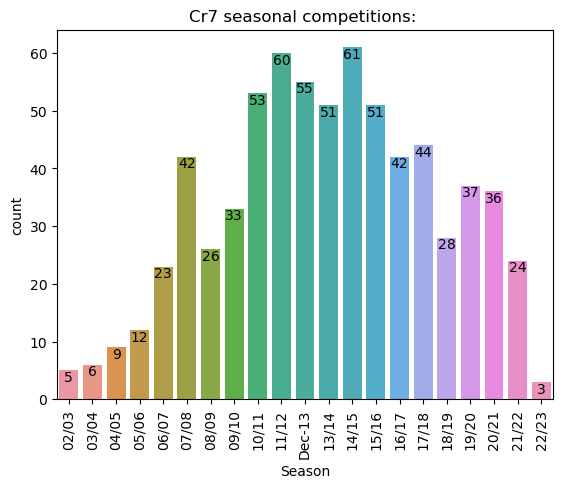

Average number of matches played by ronaldo in every seasons: 33.38095238095238


<Figure size 640x480 with 0 Axes>

In [41]:
avg_cr7=df_cr7['Season'].value_counts().mean()
p=sns.countplot(data=df_cr7,x='Season')
plt.xticks(rotation=90)
plt.title('Cr7 seasonal competitions: ')
for container in p.containers:
    p.bar_label(container,padding=-10)
plt.show()
plt.savefig('cr7 season')
print('Average number of matches played by ronaldo in every seasons:',avg_cr7)

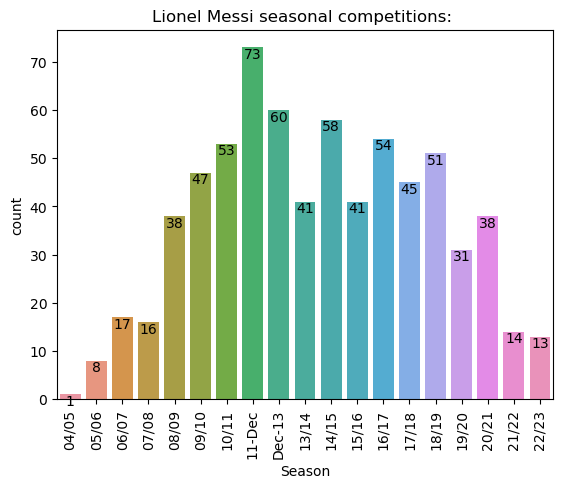

<Figure size 1500x800 with 0 Axes>

Average number of matches played by messi in every seasons: 36.78947368421053


<Figure size 640x480 with 0 Axes>

In [42]:
mess_avg=df_mess['Season'].value_counts().mean()
p=sns.countplot(data=df_mess,x='Season')
plt.xticks(rotation=90)
plt.title('Lionel Messi seasonal competitions: ')
plt.figure(figsize=(15,8))
for container in p.containers:
    p.bar_label(container,padding=-10)
plt.show()
plt.savefig('mehssii season')
print('Average number of matches played by messi in every seasons:',mess_avg)

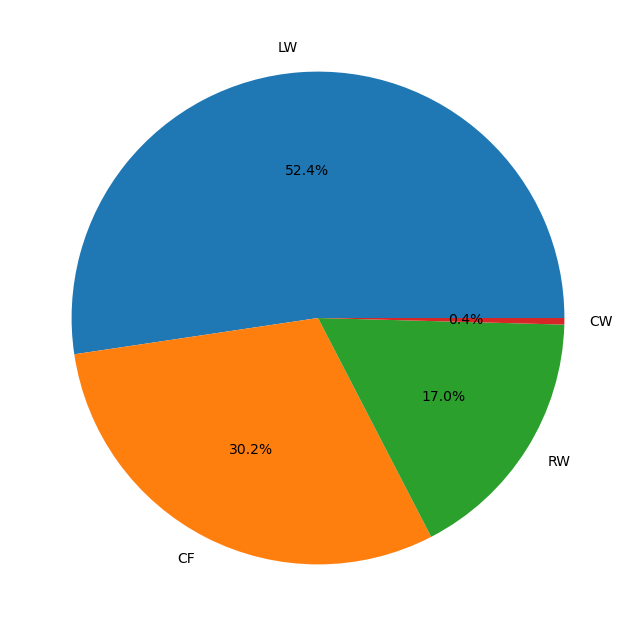

<Figure size 640x480 with 0 Axes>

In [43]:
v=df_cr7['Playing_Position'].value_counts()
plt.figure(figsize=(18,8))
plt.pie(v,labels=v.index,autopct='%.1f%%')

plt.show()
plt.savefig('cr7 position')

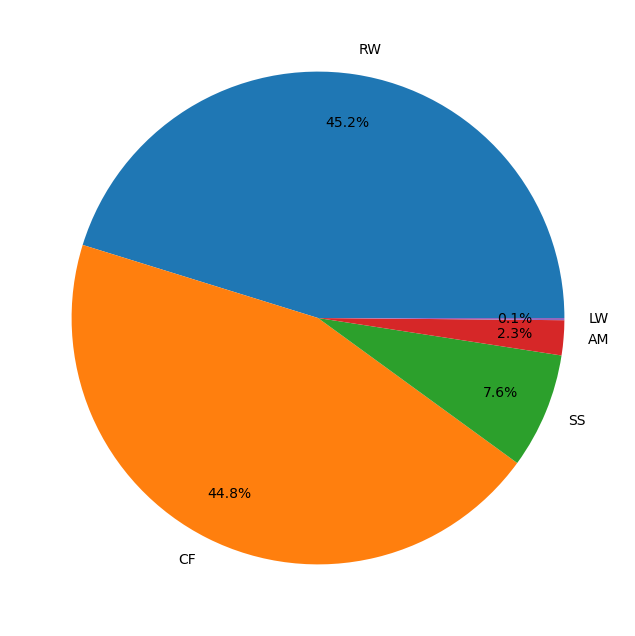

<Figure size 640x480 with 0 Axes>

In [44]:
v=df_mess['Playing_Position'].value_counts()
plt.figure(figsize=(18,8))
plt.pie(v,labels=v.index,autopct='%.1f%%',pctdistance=0.8)
plt.show()
plt.savefig('Messi position')

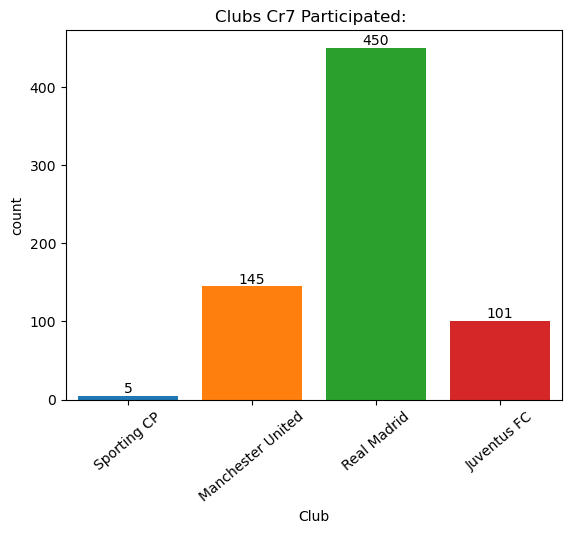

<Figure size 640x480 with 0 Axes>

In [45]:
plt.title('Clubs Cr7 Participated: ')
plt.xticks(rotation=40)
clu=sns.countplot(x=df_cr7['Club'],saturation=1)
for container in clu.containers:
    clu.bar_label(container)
plt.show()
plt.savefig('CR7 CLUB')


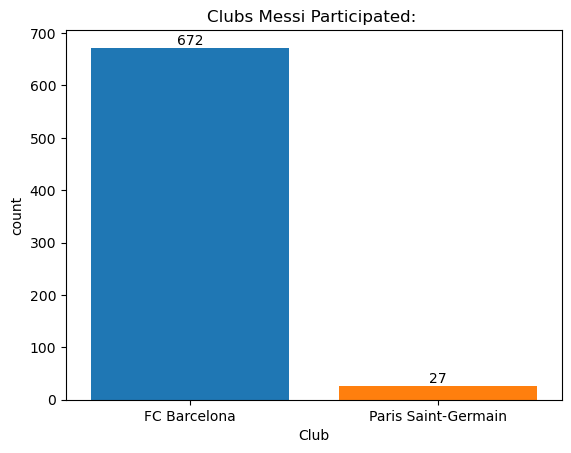

<Figure size 640x480 with 0 Axes>

In [46]:
plt.title('Clubs Messi Participated: ')
clu=sns.countplot(x=df_mess['Club'],saturation=1)
for container in clu.containers:
    clu.bar_label(container)
plt.show()
plt.savefig('Messi CLUB')

<AxesSubplot:xlabel='Opponent', ylabel='count'>

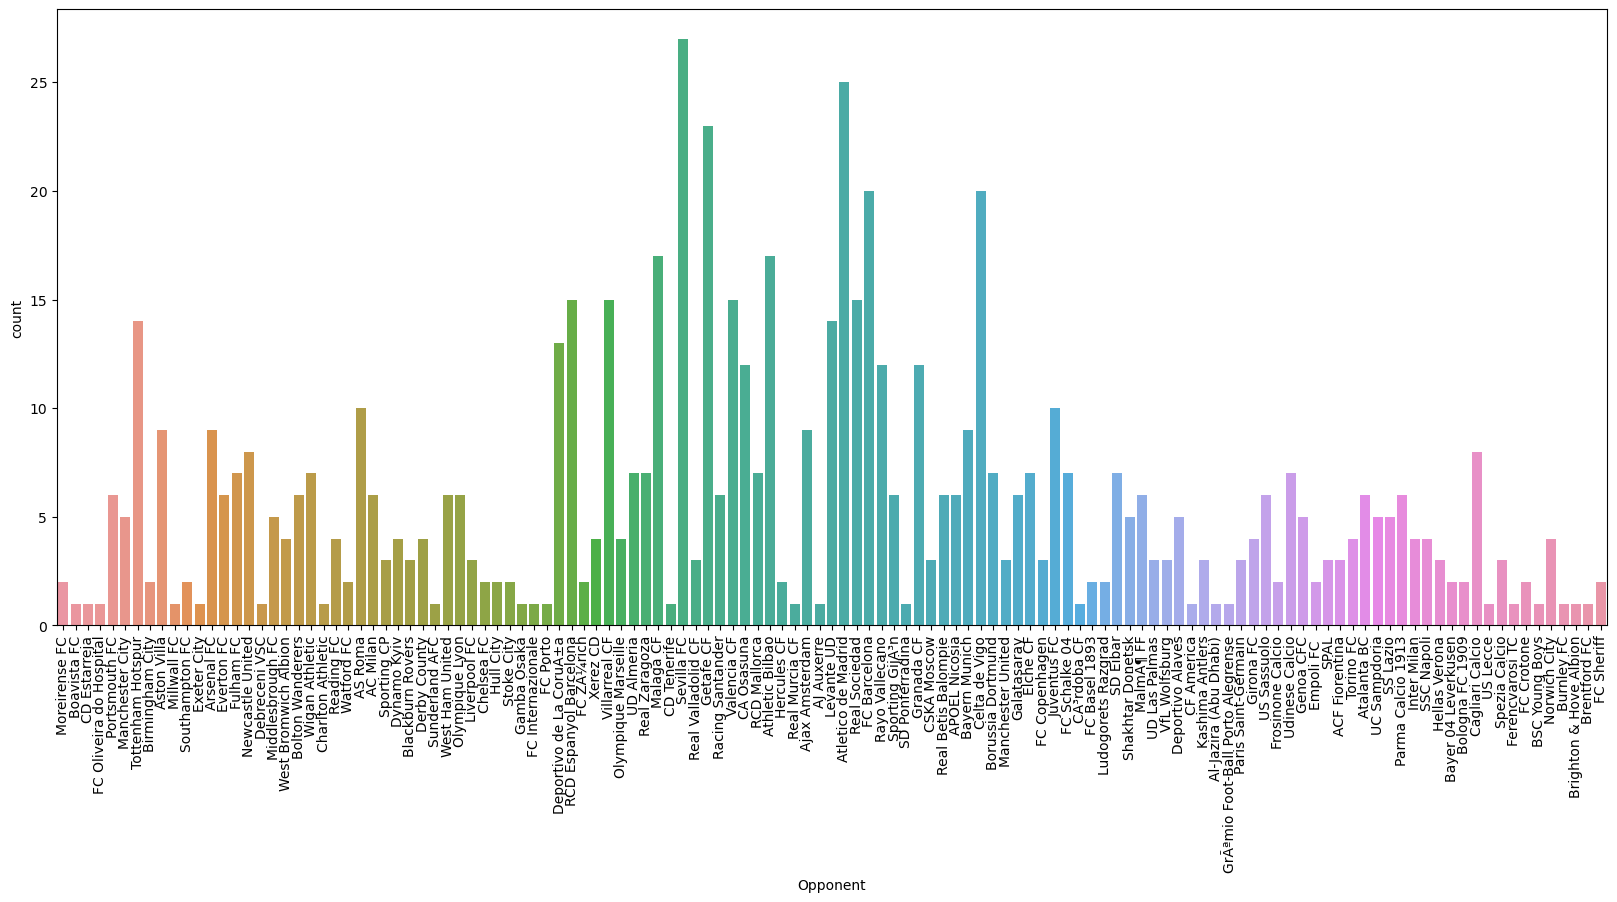

In [47]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(data=df_cr7,x='Opponent')

<AxesSubplot:xlabel='Opponent', ylabel='count'>

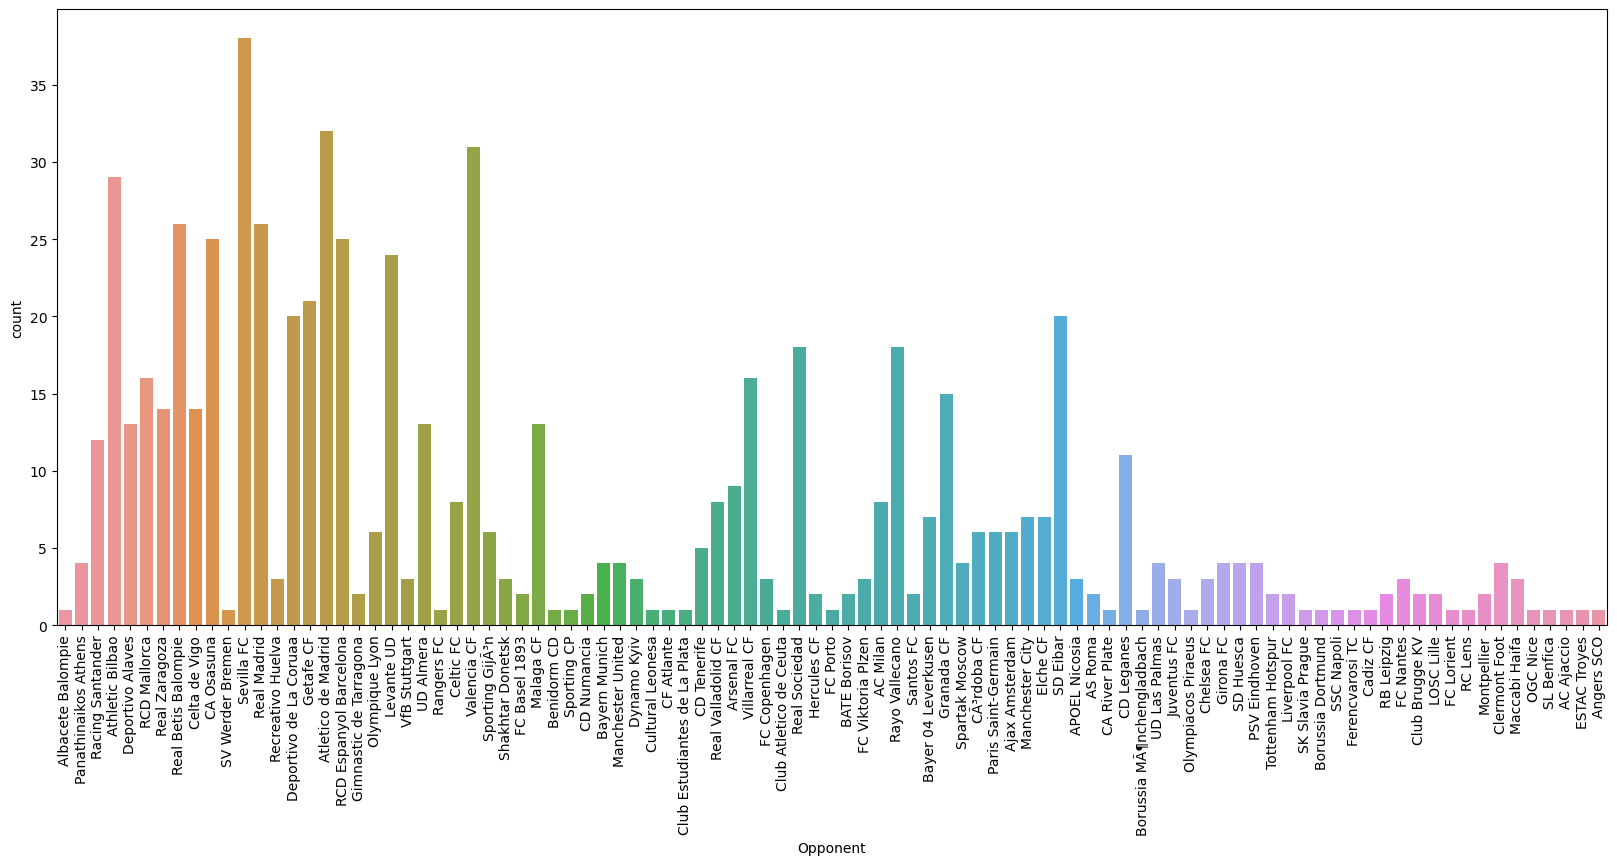

In [48]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(data=df_mess,x='Opponent')

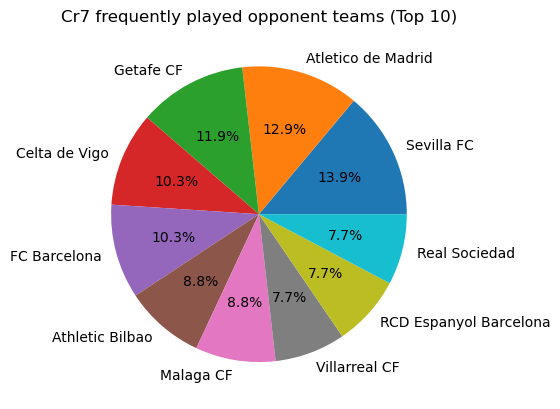

In [49]:
#top 10 opponents.
v=df_cr7['Opponent'].value_counts(normalize=True)[:10]
plt.pie(v,labels=v.index,autopct='%.1f%%')
plt.title('Cr7 frequently played opponent teams (Top 10)')
plt.show()

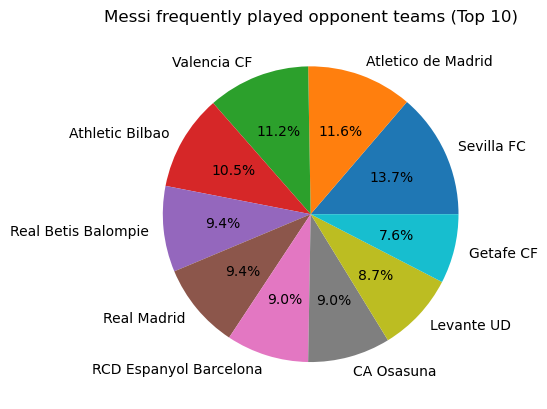

In [50]:
#top 10 opponents.
v=df_mess['Opponent'].value_counts()[:10]
plt.pie(v,labels=v.index,autopct='%.1f%%')
plt.title('Messi frequently played opponent teams (Top 10)')
plt.show()

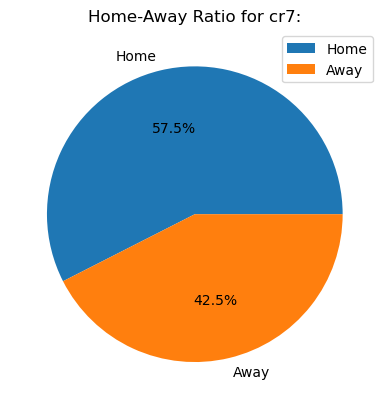

In [51]:
ha=df_cr7['Venue'].value_counts()
plt.pie(ha,labels=['Home','Away'],autopct='%.1f%%')
plt.title('Home-Away Ratio for cr7:')
plt.legend()
plt.show()

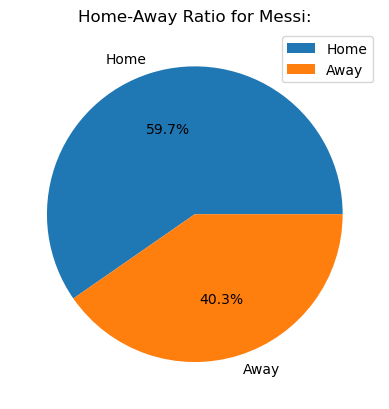

In [52]:
ha=df_mess['Venue'].value_counts()
plt.pie(ha,labels=['Home','Away'],autopct='%.1f%%')
plt.title('Home-Away Ratio for Messi:')
plt.legend()
plt.show()

In [53]:
df_cr7['Goal_assist'].value_counts()

Cristiano Ronaldo    242
Karim Benzema         44
Gareth Bale           29
Mesut Ozil            26
Marcelo               23
                    ... 
Leonardo Bonucci       1
Rui Jorge              1
Emre Can               1
Borja Mayoral          1
Roy Keane              1
Name: Goal_assist, Length: 87, dtype: int64

Goals scored by ronaldo without assists 242


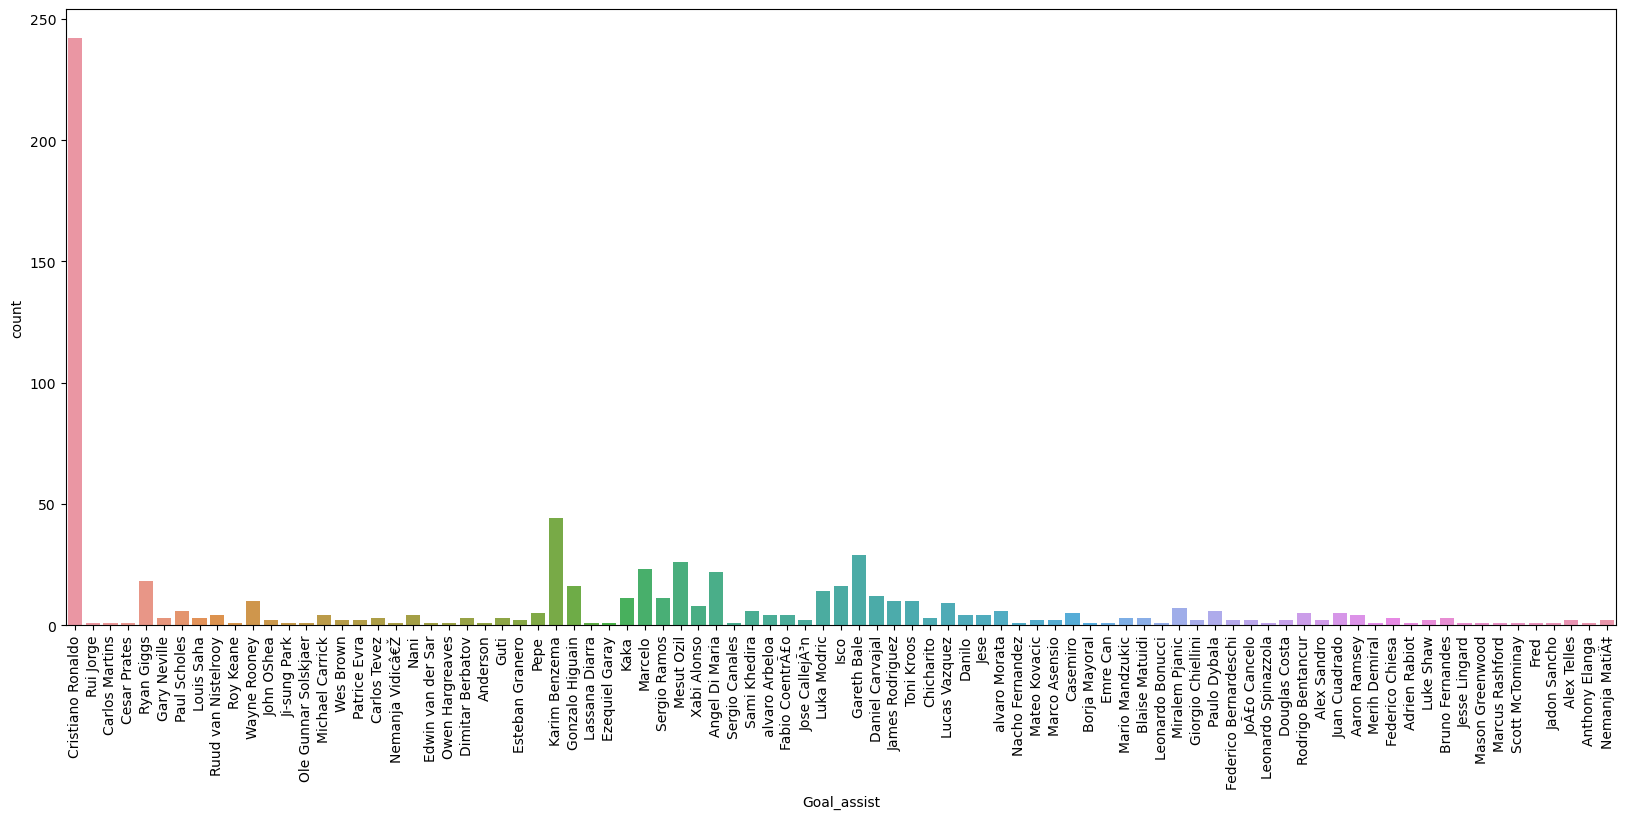

In [54]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(data=df_cr7,x='Goal_assist')
v=df_cr7['Goal_assist'].value_counts()[0]
print('Goals scored by ronaldo without assists',v)

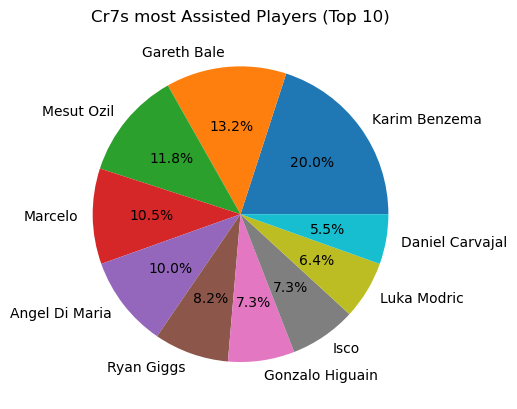

In [55]:
#top 10 goal_assists.
ga=df_cr7['Goal_assist'].value_counts()[1:11]
plt.pie(ga,labels=ga.index,autopct='%.1f%%')
plt.title('Cr7s most Assisted Players (Top 10)')
plt.show()

Goals scored by messi without assists 213


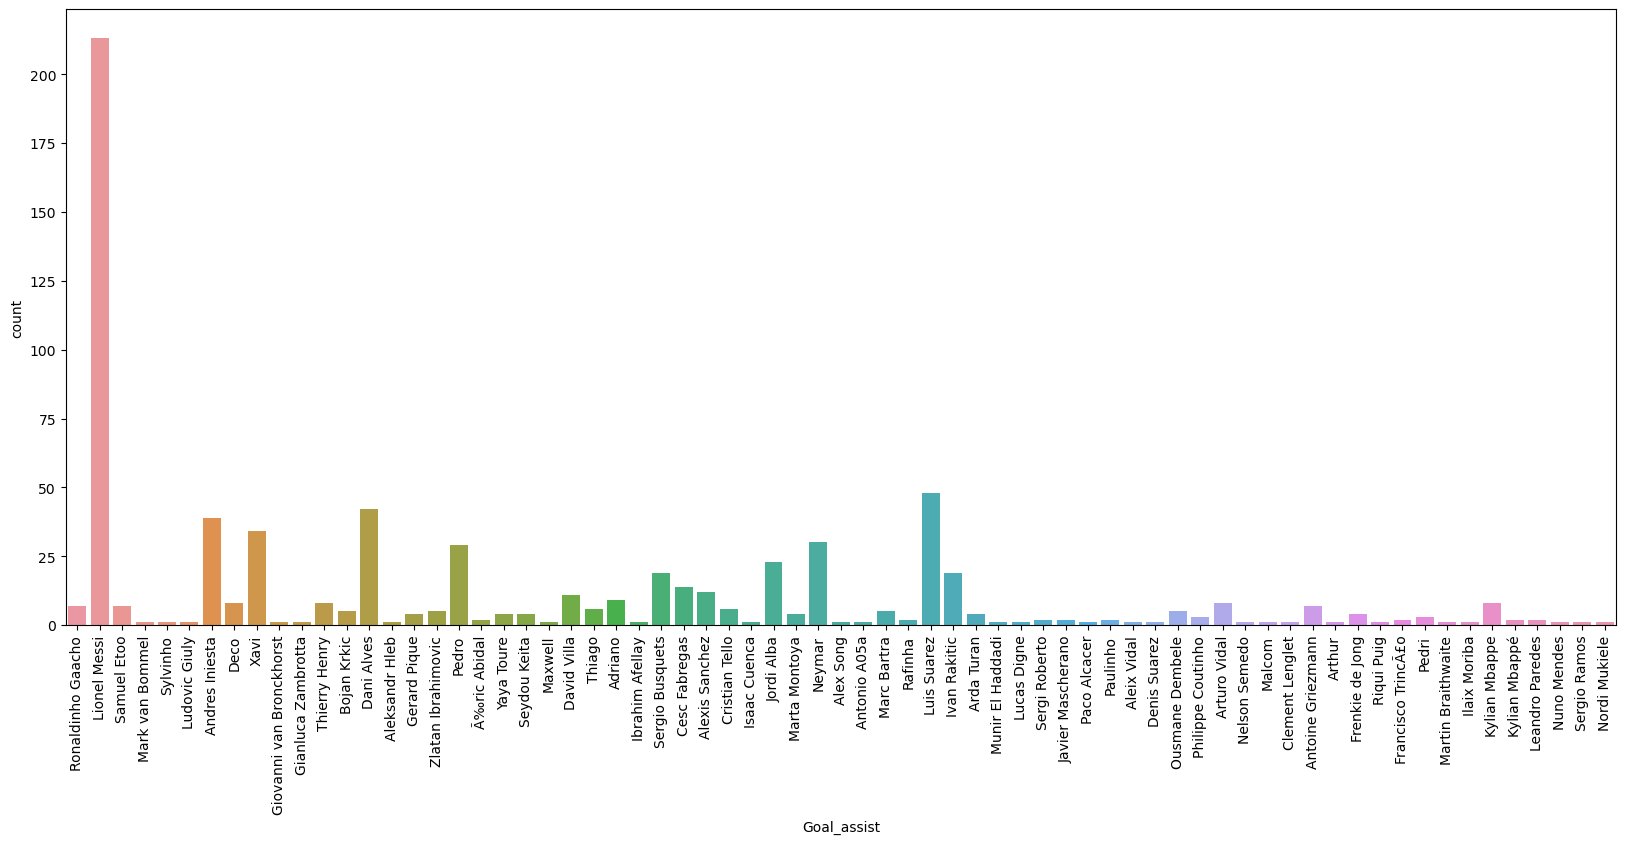

In [56]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(data=df_mess,x='Goal_assist')
v=df_mess['Goal_assist'].value_counts()[0]
print('Goals scored by messi without assists',v)

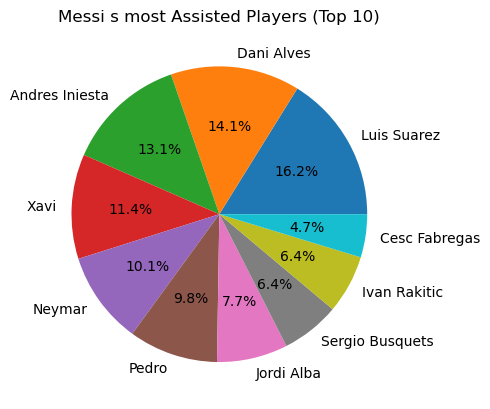

In [57]:
#top 10 goal_assists.
ga=df_mess['Goal_assist'].value_counts()[1:11]
plt.pie(ga,labels=ga.index,autopct='%.1f%%')
plt.title('Messi s most Assisted Players (Top 10)')
plt.show()

#### Types of shots:

In [58]:
# Typ=df_cr7['Type'].value_counts()

The total number of Shots playedmby Ronaldo 701


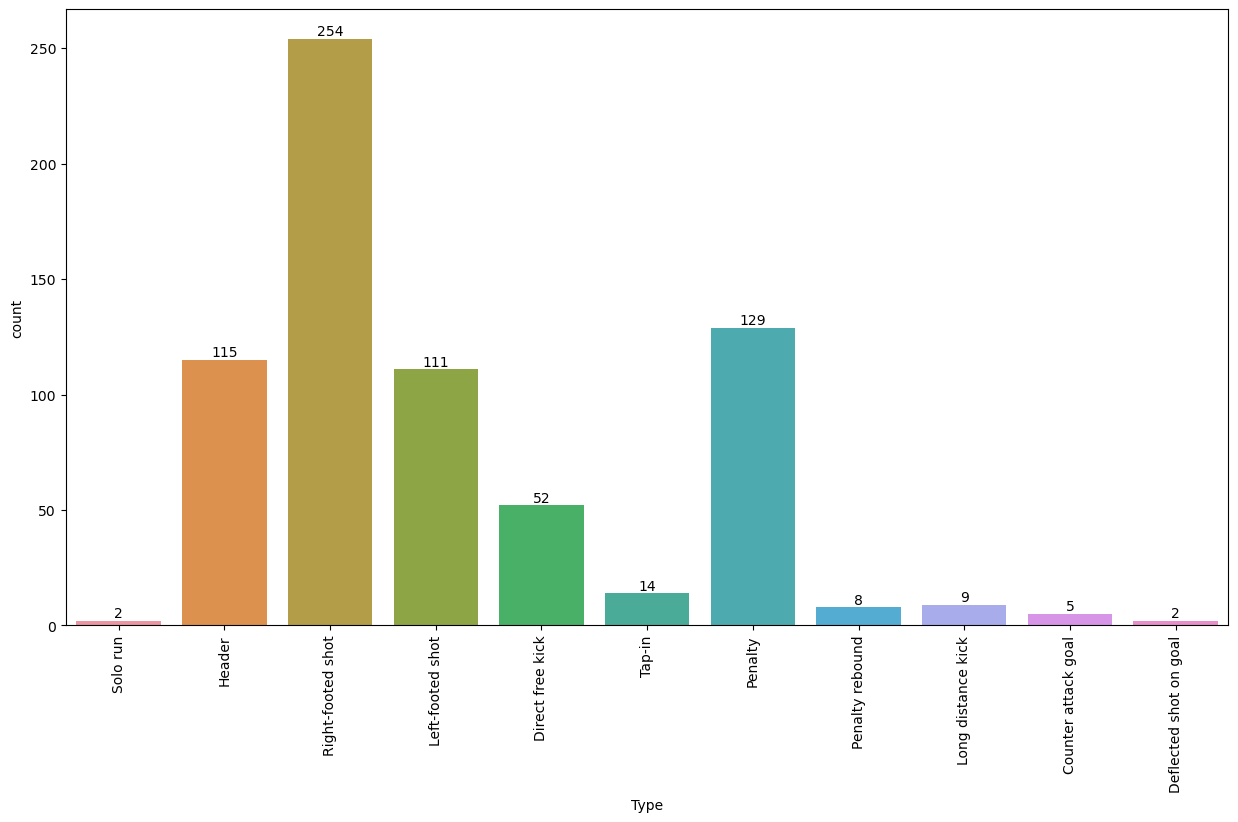

In [59]:
# plt.figure(figsize=(15,8))
# plt.pie(Typ,labels=Typ.index,autopct='%.1f%%',labeldistance=1.3,pctdistance=1)
# plt.title('Cr7 s most Types of shots')
# plt.show()
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
Typ=sns.countplot(data=df_cr7,x='Type')
for containers in Typ.containers:
    Typ.bar_label(containers)
Total=df_cr7['Type'].value_counts().sum()
print('The total number of Shots playedmby Ronaldo',
      Total)

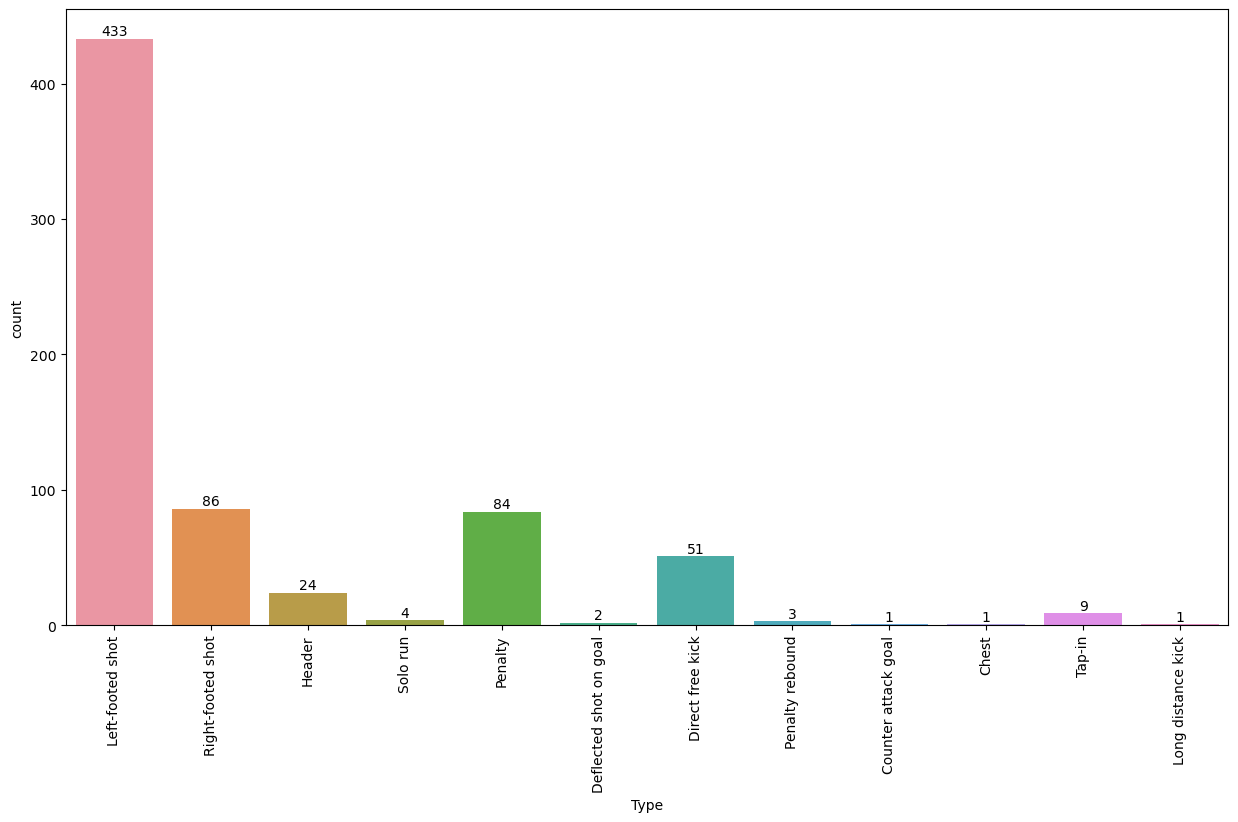

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
Typ=sns.countplot(data=df_mess,x='Type')
for containers in Typ.containers:
    Typ.bar_label(containers)
    
# plt.pie(Typ,labels=Typ.index,autopct='%.1f%%',labeldistance=1.1,pctdistance=0.8)
# plt.title('Messi s most Types of shots')
# plt.show()


#### Minutes Analysis

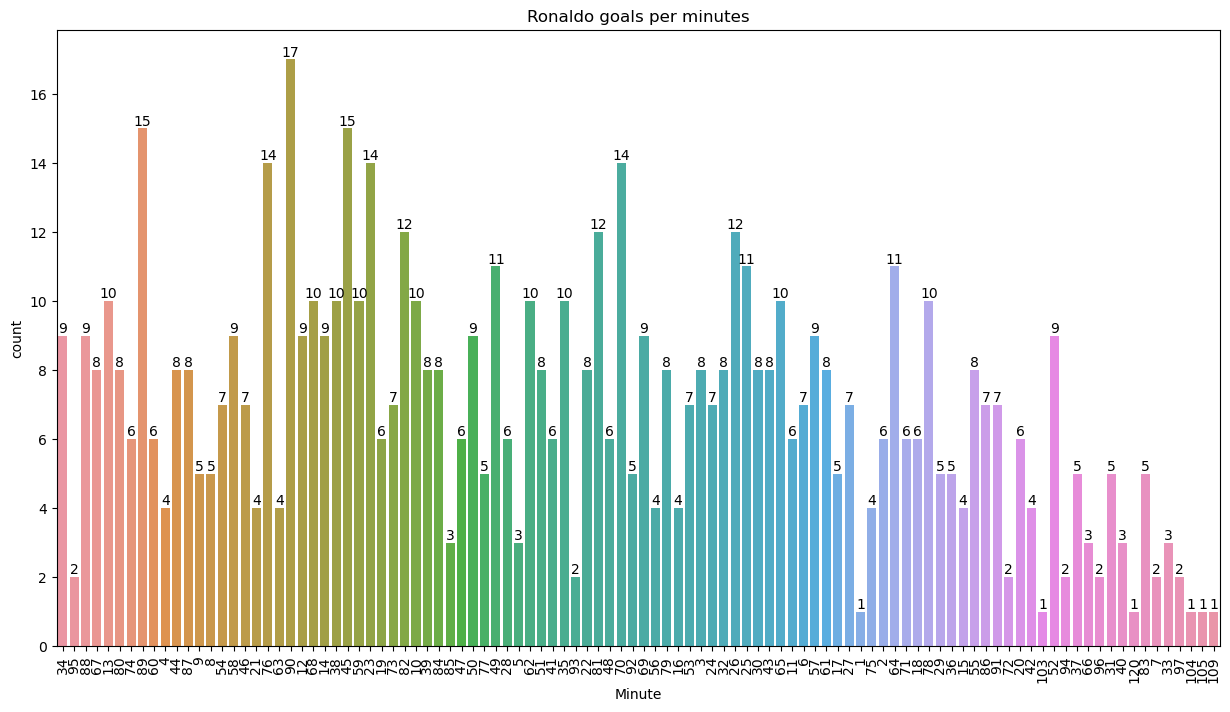

In [61]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
mints=sns.countplot(x=df_cr7['Minute'])
plt.title('Ronaldo goals per minutes')
for containers in mints.containers:
    mints.bar_label(containers)

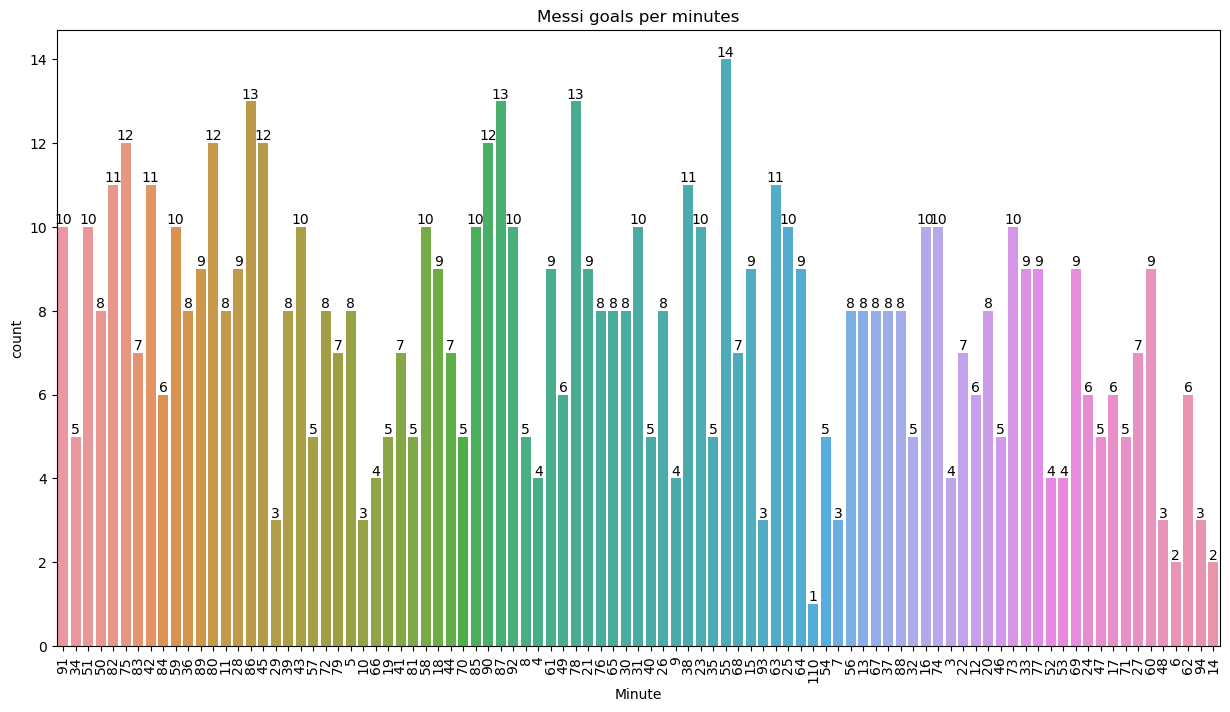

In [62]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
mints=sns.countplot(x=df_mess['Minute'])
plt.title('Messi goals per minutes')
for containers in mints.containers:
    mints.bar_label(containers)